In [1]:
import astropy
from astropy.io import fits
import numpy
from numpy import *
import matplotlib as mpl
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import yt
from IPython.display import Image
from yt.units import G
from astropy.modeling.models import Sersic2D
from astropy.convolution import convolve_fft, Gaussian2DKernel

%matplotlib inline

In [2]:
fig_dir = '/Users/rsimons/Dropbox/rcs_foggie/figures'
sat_n = 0
W = yt.YTArray([15, 15, 5], 'kpc')
N = 500
north_vector = [0,1,0]


In [3]:
#snames = array(['DD%.4i'%i for i in [906, 907, 956]])
snames = array(['DD%.4i'%i for i in [906, 907, 956]])
#snames = array(['DD%.4i'%i for i in [956]])


ds = []
mf = []
xa = []
for sname in snames:
    mf.append(fits.open('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_nref10f_%s_momentum.fits'%sname))
    ds.append(yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/%s/%s'%(sname, sname)))
    xa.append(np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_orig_%s_sat%i.npy'%(sname, sat_n))[()])
ds = array(ds)
mf = array(mf)
xa = array(xa)
    

yt : [INFO     ] 2019-01-24 10:14:26,420 Parameters: current_time              = 295.31646372462
yt : [INFO     ] 2019-01-24 10:14:26,421 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-01-24 10:14:26,423 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-01-24 10:14:26,424 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-01-24 10:14:26,425 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-01-24 10:14:26,426 Parameters: current_redshift          = 0.90013226819215
yt : [INFO     ] 2019-01-24 10:14:26,426 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2019-01-24 10:14:26,427 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2019-01-24 10:14:26,428 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2019-01-24 10:14:26,463 Parameters: current_time              = 295.56646392326
yt : [INFO     ] 2019-01-24 10:14:26,464 Parameters: domain_dimensions         = [256

In [4]:
sms = []
sgs = []
L_inits = []
L_ns = []
cens = []

kern = Gaussian2DKernel(0.5*(N/15.))

for s, sname in enumerate(snames):
    cen   = yt.YTArray([xa[s][0], xa[s][1], xa[s][2]], 'kpc')
    L     = yt.YTArray([xa[s][3], xa[s][4], xa[s][5]], 'km/s')
    L_init = L.copy()
    L_init_mag = sqrt(sum(L_init**2))
    L_mag = sqrt(sum(L**2))
    L_n   = L/L_mag
    
    L_inits.append(L_init)
    L_ns.append(L_n)
    cens.append(cen)
    
    sat_mstar_dens = yt.off_axis_projection(ds[s], cen, -L_n, W, N, 
                                            ('deposit', 'io_density'), 
                                            north_vector =  north_vector)
    sat_mstar_dens_c = yt.YTArray(convolve_fft(sat_mstar_dens, kern), sat_mstar_dens.units)
    sat_gas_dens = yt.off_axis_projection(ds[s], cen, -L_n, W, N, 
                                          ('gas', 'density'), 
                                          north_vector =  north_vector)
    
    sms.append(sat_mstar_dens_c)
    sgs.append(sat_gas_dens)
    

Parsing Hierarchy : 100%|██████████| 4732/4732 [00:00<00:00, 6455.46it/s]
yt : [INFO     ] 2019-01-24 10:14:31,009 Gathering a field list (this may take a moment.)
/anaconda2/envs/grizli/lib/python3.5/site-packages/astropy/convolution/convolve.py:670: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  bigarray[arrayslices] = array
/anaconda2/envs/grizli/lib/python3.5/site-packages/astropy/convolution/convolve.py:676: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  bigkernel[kernslices] = normalized_kernel
/anaconda2/envs/grizli/lib/python3.5/sit

yt : [INFO     ] 2019-01-24 10:23:38,079 Making a fixed resolution buffer of (('gas', 'density')) 500 by 500
yt : [INFO     ] 2019-01-24 10:23:40,797 Making a fixed resolution buffer of (('gas', 'velocity_x')) 500 by 500
yt : [INFO     ] 2019-01-24 10:23:41,577 Making a fixed resolution buffer of (('gas', 'velocity_y')) 500 by 500
yt : [INFO     ] 2019-01-24 10:23:42,147 Making a fixed resolution buffer of (('gas', 'velocity_z')) 500 by 500
yt : [INFO     ] 2019-01-24 10:23:42,754 Making a fixed resolution buffer of (('gas', 'density')) 500 by 500
yt : [INFO     ] 2019-01-24 10:23:44,914 Making a fixed resolution buffer of (('gas', 'velocity_x')) 500 by 500
yt : [INFO     ] 2019-01-24 10:23:45,235 Making a fixed resolution buffer of (('gas', 'velocity_y')) 500 by 500
yt : [INFO     ] 2019-01-24 10:23:45,575 Making a fixed resolution buffer of (('gas', 'velocity_z')) 500 by 500
yt : [INFO     ] 2019-01-24 10:23:45,914 Making a fixed resolution buffer of (('gas', 'density')) 500 by 500
y

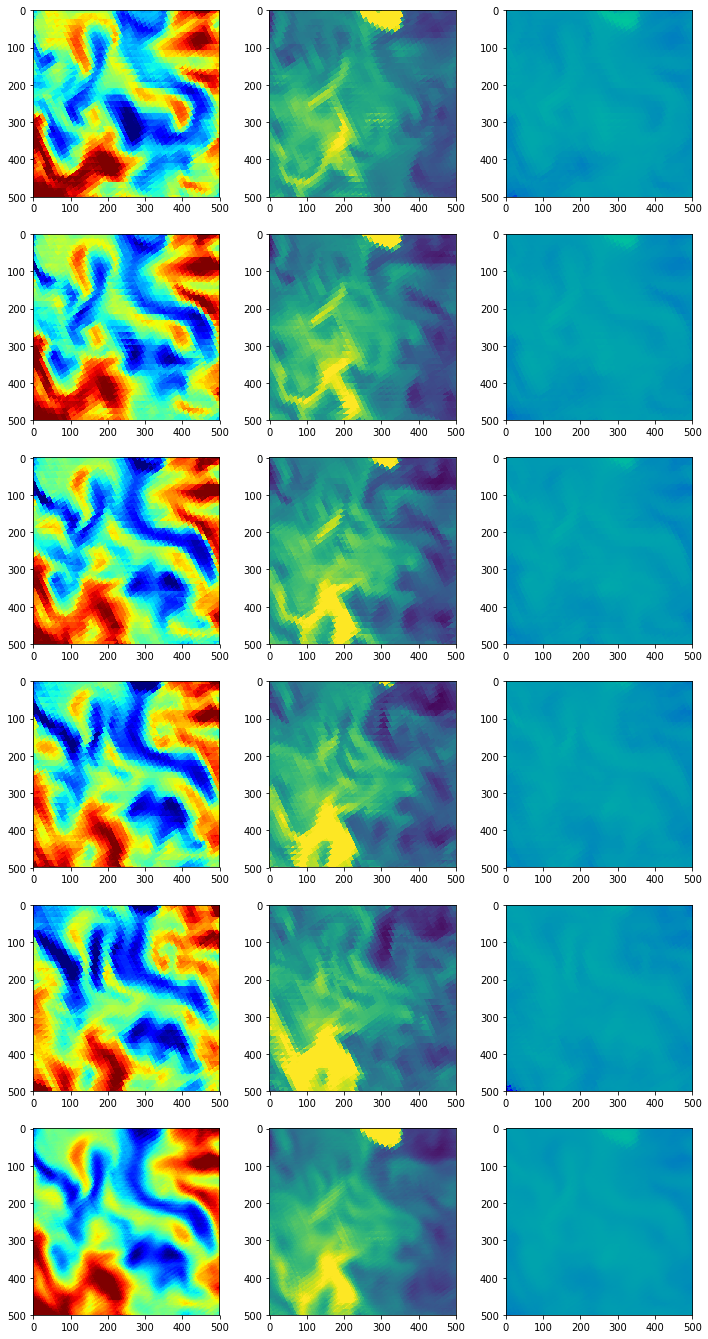

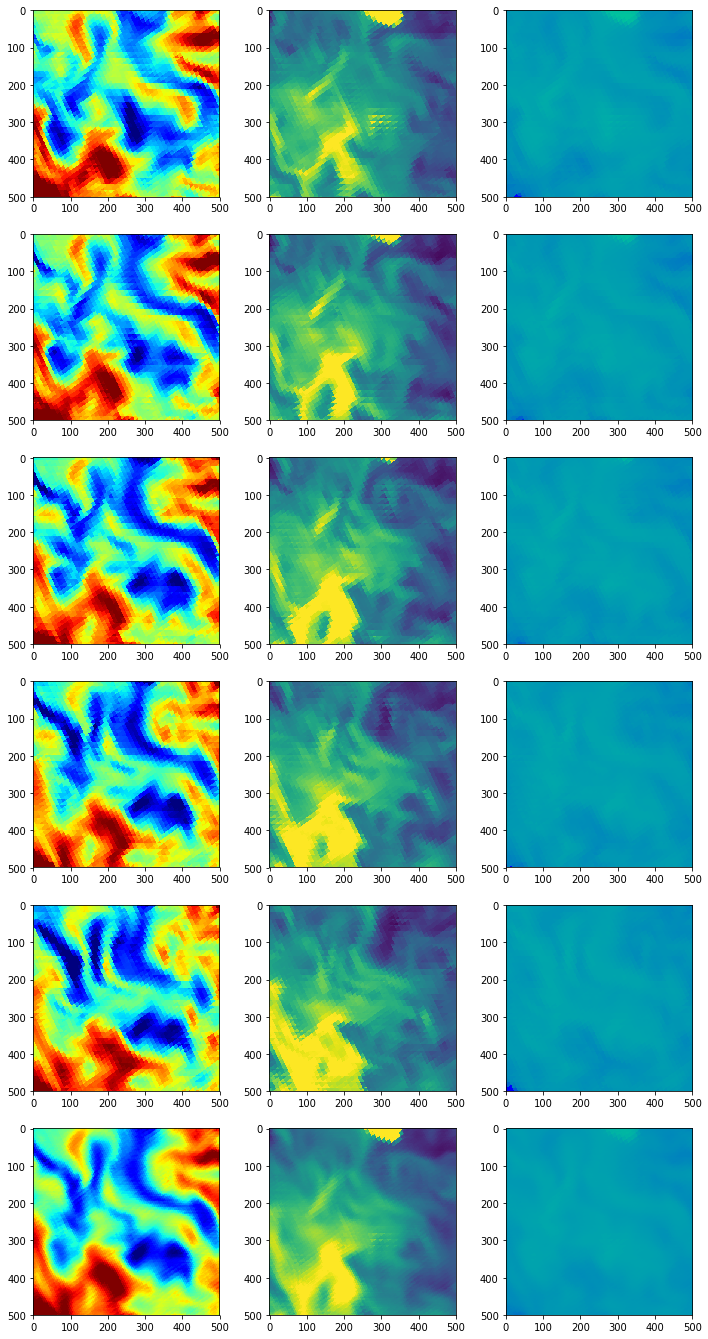

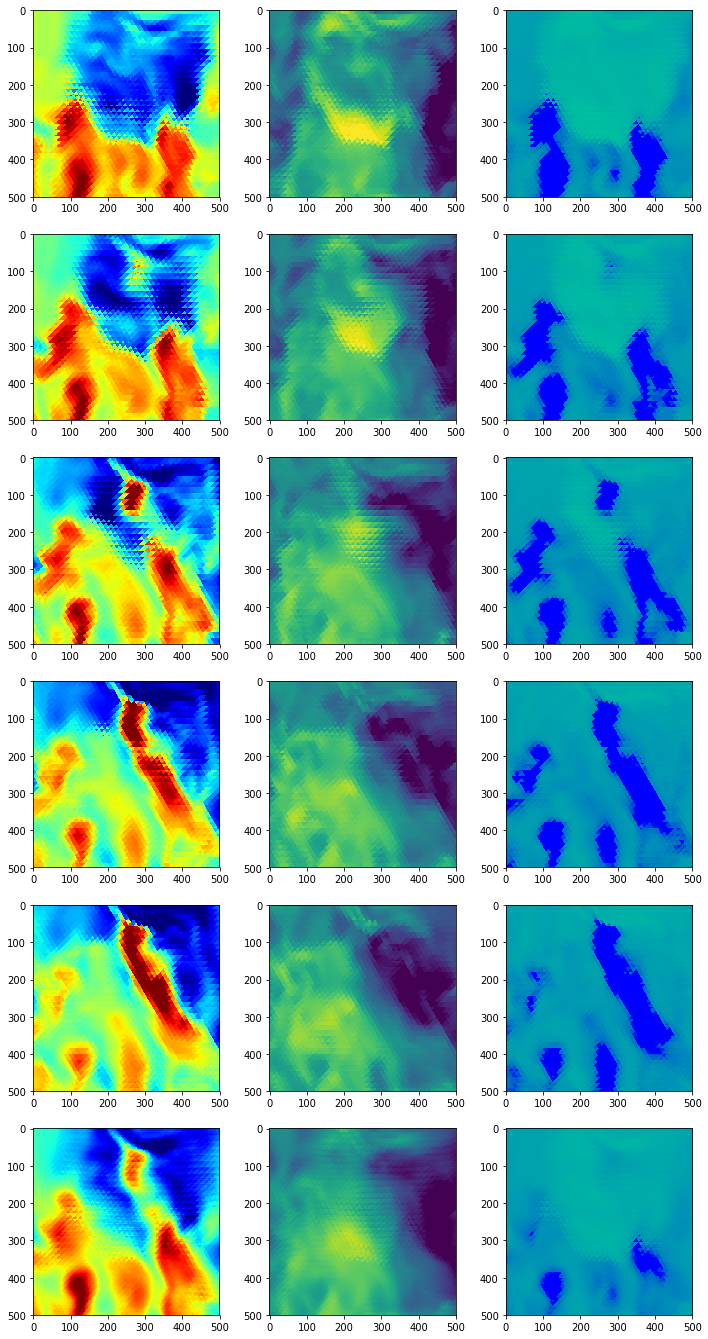

In [6]:
x = 5

rams = []
for s, sname in enumerate(snames):
    fig, ax = plt.subplots(x + 1, 3, figsize = (12, (12/3.)*(x+1.)))
    vel_Ls = zeros((N, N))
    scr_ds = zeros((N, N))
    ram_ps = zeros((N, N))
    for i in arange(x):
        cenS_i   = cens[s] + yt.YTArray([5 + 0.5*i], 'kpc') * L_ns[s]
        cp       = ds[s].cutting(L_inits[s], cenS_i, north_vector)
        frb      = cp.to_frb((15, 'kpc'), N)
        dens_s = frb["gas", "density"]
        vel_x = L_inits[s][0] - frb["gas", "velocity_x"].in_units('km/s')
        vel_y = L_inits[s][1] - frb["gas", "velocity_y"].in_units('km/s')
        vel_z = L_inits[s][2] - frb["gas", "velocity_z"].in_units('km/s')

        vel_mag  = sqrt(vel_x**2. + vel_y**2. + vel_z**2.)
        vel_dot  = (vel_x * L_ns[s][0] + vel_y * L_ns[s][1] + vel_z * L_ns[s][2])/(vel_mag)
        vel_L    = vel_mag * vel_dot
        vmn = median(vel_L.value.ravel()) - 2. * std(vel_L.value.ravel())
        vmx = median(vel_L.value.ravel()) + 2. * std(vel_L.value.ravel())
        ax[i, 0].imshow(vel_L.value, vmin = vmn, vmax = vmx, cmap = cm.jet)

        vmn = median(log10(dens_s.value)) - 2. * std(log10(dens_s.value))
        vmx = median(log10(dens_s.value)) + 2. * std(log10(dens_s.value))
        ax[i, 1].imshow(log10(dens_s.value), 
                        vmin = vmn, vmax = vmx, 
                        cmap = cm.viridis)

        scr_ds += dens_s.value
        vel_Ls += vel_L.value

        vel_L[vel_L > 0.] = 1.e-20
        ram_pres = dens_s * vel_L**2.
        ax[i, 2].imshow(log10(ram_pres.to('dyn/cm**2')), 
                        vmin = -20, vmax = -10, 
                        cmap = cm.winter)
        ram_ps += ram_pres.to('dyn/cm**2').value

    vel_Ls = vel_Ls/x
    scr_ds = scr_ds/x
    ram_ps = ram_ps/x              

    rams.append(ram_ps)
    vmn = median(vel_Ls.ravel()) - 2. * std(vel_Ls.ravel())
    vmx = median(vel_Ls.ravel()) + 2. * std(vel_Ls.ravel())
    ax[x, 0].imshow(vel_Ls, vmin = vmn, vmax = vmx, cmap = cm.jet)

    vmn = median(log10(scr_ds)) - 2. * std(log10(scr_ds))
    vmx = median(log10(scr_ds)) + 2. * std(log10(scr_ds))
    ax[x, 1].imshow(log10(scr_ds), vmin = vmn, vmax = vmx, cmap = cm.viridis)

    ax[x, 2].imshow(log10(ram_ps), vmin = -20, vmax = -10, cmap = cm.winter)





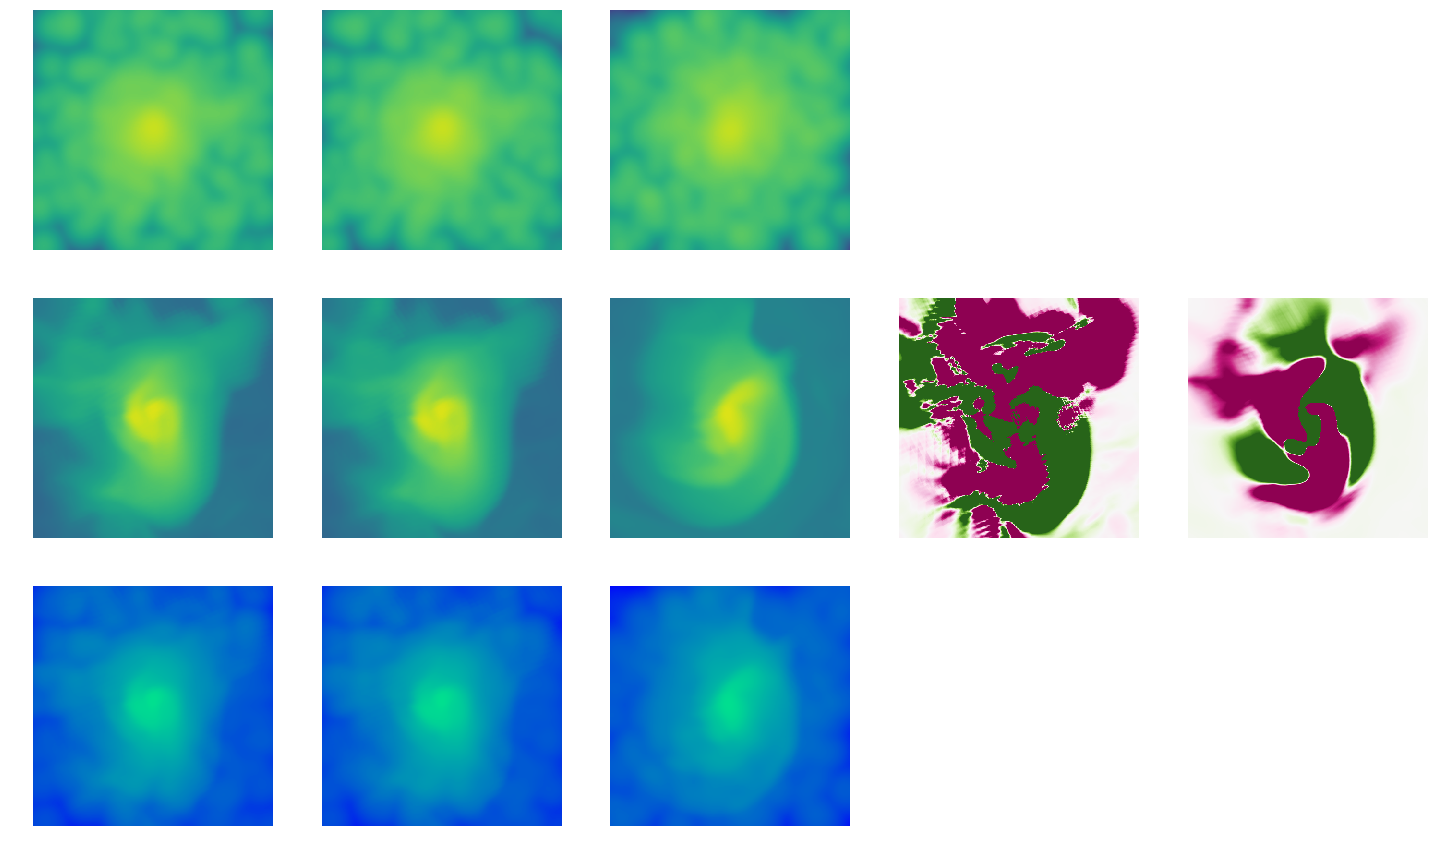

In [7]:
fig, axes = plt.subplots(3,5, figsize = (25,15))
anchs = []
for s, sname in enumerate(snames):
    anch_force = 2 * pi * G * sms[s] * sgs[s]
    anchs.append(anch_force)
    axes[0, s].imshow(np.log10(sms[s]), vmin = -9, vmax = -1)
    axes[1, s].imshow(np.log10(sgs[s]), vmin = -9, vmax = -1)
    axes[2, s].imshow(np.log10(anch_force.to('dyn/cm**2')), vmin = -20, vmax = -8, cmap = cm.winter)

dt = ds[1].current_time.to('yr') - ds[0].current_time.to('yr')

dsms = ((sms[1] - sms[0])/dt).to('Msun/(kpc**2. * yr)')
dsgs = ((sgs[1] - sgs[0])/dt).to('Msun/(kpc**2. * yr)')

dt2 = ds[2].current_time.to('yr') - ds[0].current_time.to('yr')

dsgs2 = ((sgs[2] - sgs[0])/dt2).to('Msun/(kpc**2. * yr)')

axes[1, 3].imshow(dsgs.value, vmin = -0.001, vmax = 0.001, cmap = cm.PiYG)
axes[1, 4].imshow(dsgs2.value, vmin = -0.001, vmax = 0.001, cmap = cm.PiYG)
    
    
    
    
for a in axes.ravel(): a.axis('off')



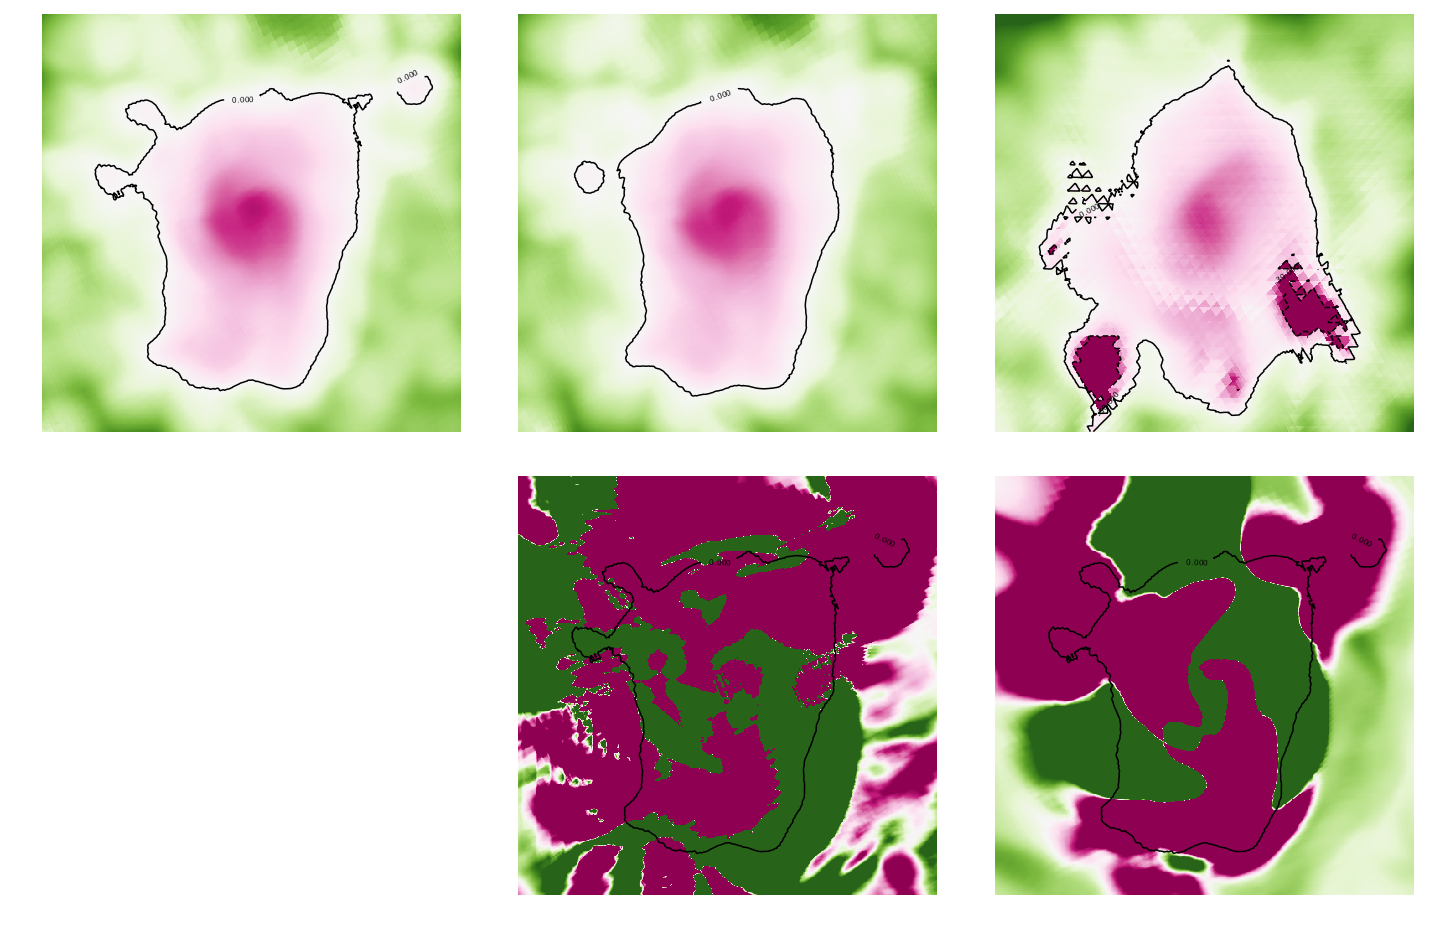

In [88]:
fig, axes = plt.subplots(2,3, figsize = (20, 13))
ra_frac_0 = rams[0]/anchs[0].to('dyn/cm**2').value
ra_frac_1 = rams[1]/anchs[1].to('dyn/cm**2').value
ra_frac_2 = rams[2]/anchs[2].to('dyn/cm**2').value


x = np.arange(0, N, 1)
y = np.arange(0, N, 1)
X, Y = np.meshgrid(x, y)




axes[0,0].imshow(log10(ra_frac_0), vmin = -5, vmax = 5, cmap = cm.PiYG)
axes[0,1].imshow(log10(ra_frac_1), vmin = -5, vmax = 5, cmap = cm.PiYG)
axes[0,2].imshow(log10(ra_frac_2), vmin = -5, vmax = 5, cmap = cm.PiYG)

rafs = [ra_frac_0, ra_frac_1, ra_frac_2]
for i in arange(3):
    for j in arange(2):
        if j == 0:
            Z = log10(rafs[i])
        else:
            Z = log10(rafs[0])
        if (i == 0) & (j == 1):
            pass
        else:
            CS = axes[j,i].contour(X, Y, Z, 1, colors='k')
            axes[j,i].clabel(CS, fontsize=9, inline=1)

    
    
    
dt = ds[1].current_time.to('yr') - ds[0].current_time.to('yr')
dt2 = ds[2].current_time.to('yr') - ds[1].current_time.to('yr')

dsgs = ((sgs[1] - sgs[0])/dt).to('Msun/(kpc**2. * yr)')
dsgs2 = ((sgs[2] - sgs[0])/dt2).to('Msun/(kpc**2. * yr)')

axes[1,1].imshow(dsgs.value, vmin = -1.e-4, vmax = 1.e-4, cmap = cm.PiYG)
axes[1,2].imshow(dsgs2.value, vmin = -1.e-4, vmax = 1.e-4, cmap = cm.PiYG)
    
    
for ax in axes.ravel(): ax.axis('off')

fig.tight_layout()



Text(0,0.5,'$d\\Sigma_{g}/dt$ (M$_{\\odot}$ kpc$^{-2}$ yr$^{-1}$)')

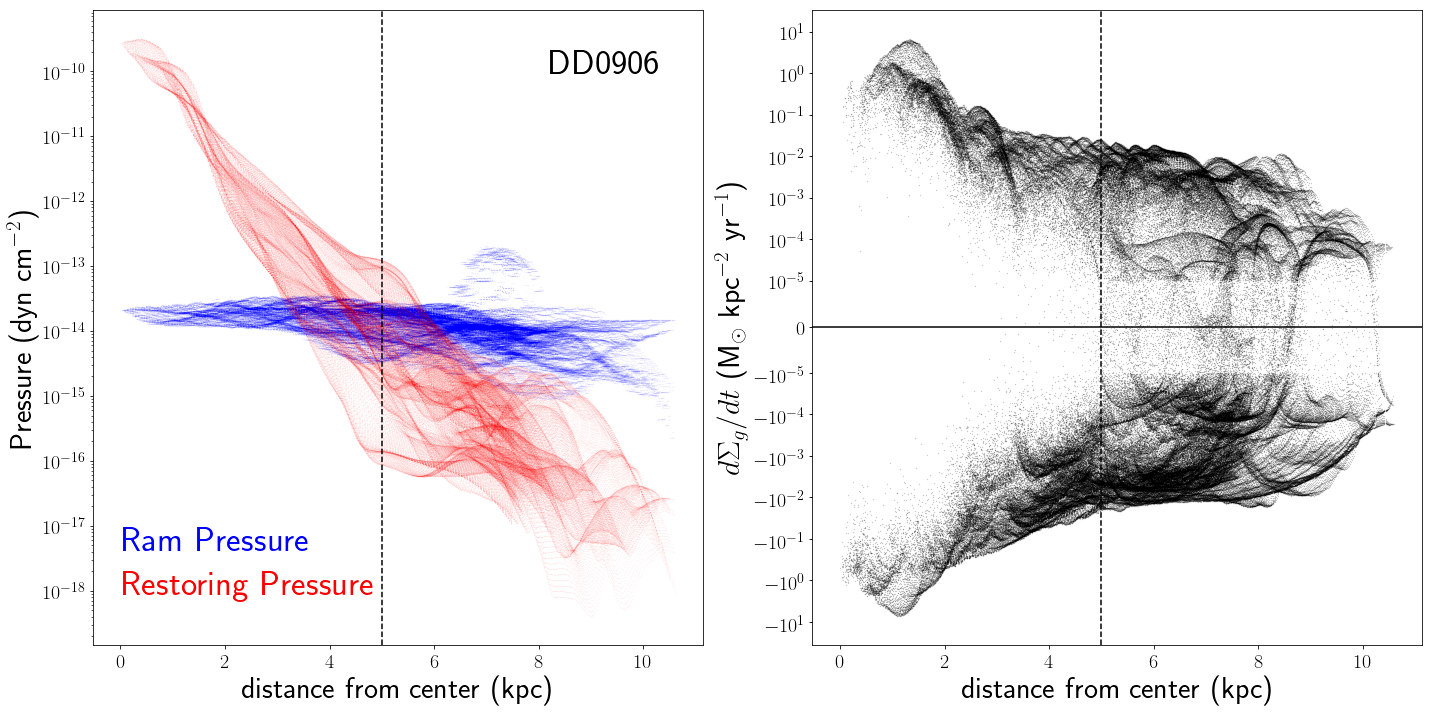

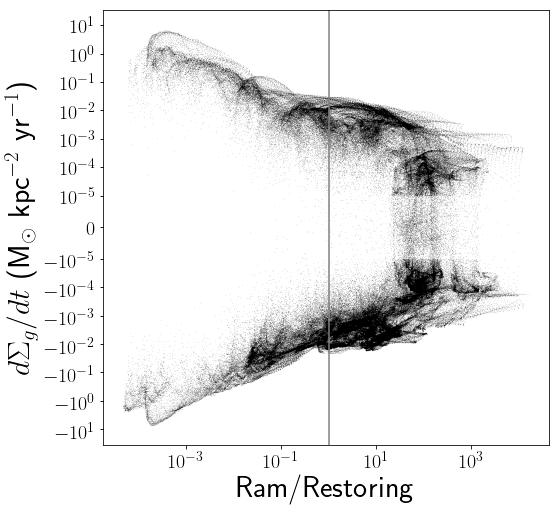

In [106]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

fig, (axes, axes2) = plt.subplots(1,2, figsize = (20, 10))



r = sqrt((X - N/2.)**2. + (Y-N/2.)**2.) * 15./N

axes.plot(r.ravel(), rams[0].ravel(),'b.', markersize = 0.1, alpha = 0.3)
axes.plot(r.ravel(), anchs[0].to('dyn/cm**2').value.ravel(),'r.', markersize = 0.1, alpha = 0.3)


#axes2 = axes.twinx()


dt = ds[1].current_time.to('yr') - ds[0].current_time.to('yr')

dsgs = ((sgs[1] - sgs[0])/dt).to('Msun/(kpc**2. * yr)')    
    
axes2.plot(r.ravel(), dsgs.value.ravel(), 'k.', markersize = 0.6, alpha = 0.3)


#axes2.set_ylim(-5.e-4, 5.e-4)

axes.axvline(x = 5, linestyle = '--', color = 'black')
axes2.axhline(y = 0.0, linestyle = '-', color = 'black')
axes2.axvline(x = 5, linestyle = '--', color = 'black')

axes.annotate('Ram Pressure', (0.05, 0.15), xycoords = 'axes fraction', color = 'blue', fontsize = 35, fontweight = 'bold')
axes.annotate('Restoring Pressure',  (0.05, 0.08), xycoords = 'axes fraction',color = 'red', fontsize = 35, fontweight = 'bold')
axes.annotate(snames[0],  (0.75, 0.90), xycoords = 'axes fraction',color = 'black', fontsize = 35)

#axes2.annotate(snames[1] + ' - ' + snames[0],  (0.60, 0.90), xycoords = 'axes fraction',color = 'black', fontsize = 35)


axes.set_yscale('log')
axes2.set_yscale('symlog', linthreshy=0.00001)
for ax in [axes, axes2]:
    ax.set_xlabel('distance from center (kpc)', fontsize = 30)
axes.set_ylabel('Pressure (dyn cm$^{-2}$)', fontsize = 30)
axes2.set_ylabel('$d\Sigma_{g}/dt$ (M$_{\odot}$ kpc$^{-2}$ yr$^{-1}$)', fontsize = 30)


fig.tight_layout()




fig, ax = plt.subplots(1,1, figsize = (8, 8))



ax.plot(rams[0].ravel()/anchs[0].to('dyn/cm**2').value.ravel(), dsgs.value.ravel(), 'k.', markersize = 0.2, alpha = 0.3)
ax.axvline(x = 1., linestyle = 'solid', color = 'grey')
ax.set_yscale('symlog', linthreshy=0.00001)
ax.set_xscale('log')
ax.set_xlabel('Ram/Restoring', fontsize = 30)
ax.set_ylabel('$d\Sigma_{g}/dt$ (M$_{\odot}$ kpc$^{-2}$ yr$^{-1}$)', fontsize = 30)





In [22]:
anchs[0].to('dyn/cm**2').value.ravel()

array([9.32967791e-19, 1.09227398e-18, 1.27723334e-18, ...,
       2.65059256e-17, 2.61594017e-17, 2.57166618e-17])

In [116]:
xa[0]

array([ 3.73124564e+04,  3.65424676e+04,  3.81908239e+04, -5.87263381e+01,
       -1.69039376e+02,  1.03032242e+02,  3.43661624e+01,  4.01180129e+01,
       -4.68681719e+01, -1.98404469e+01, -2.33531738e+01,  4.19910057e+01])

In [120]:
(L * dt).to('kpc')

YTArray([-0.6227378 , -1.23772244,  0.82256211]) kpc

In [114]:
L_inits

[YTArray([-0.28440076, -0.81862635,  0.49896604]) km/s,
 YTArray([-0.28606181, -0.81943433,  0.49668503]) km/s,
 YTArray([-0.38647565, -0.76813963,  0.51048808]) km/s]

In [118]:
L     = yt.YTArray([xa[s][3], xa[s][4], xa[s][5]], 'km/s')


In [119]:
L

YTArray([-113.19252221, -224.97578517,  149.51377576]) km/s